## 2024S-T3 AML 3104 - Neural Networks and Deep Learning

Instructor: Ishant Gupta

Student: Antonio Carlos De Mello Mendes - c0866063@mylambton.ca

Dataset: 

*TensorFlow. (2024). Fashion MNIST. TensorFlow. Retrieved July 9, 2024, from https://www.tensorflow.org/datasets/catalog/fashion_mnist*

## Fashion MNIST Classification with Artificial Neural Networks (ANNs) and Visualizations

In [150]:
!pip install -q -U tensorflow>=3.0.1

In [1]:
# Loading libraries
import pandas as pd
import numpy as np

# Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

# Import Fashion MNIST dataset from keras library
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

## Loading and explore the Dataset

In [2]:
# Split the dataset into Train images and Test images
(X_train_images, y_train_labels), (X_test_images, y_test_labels) = datasets.fashion_mnist.load_data()

# Reshape the X_train and X_test dataset for a single channel
X_train_images = X_train_images.reshape((X_train_images.shape[0], 28, 28, 1))
X_test_images = X_test_images.reshape((X_test_images.shape[0], 28, 28, 1))

In [3]:
# This is typically found in the context of image data concerning the dimensions (28x28) of each sample with a label of 10 classes      
(X_train_images.shape, y_train_labels.shape) # The sample for training

((60000, 28, 28, 1), (60000,))

In [4]:
# The sample for testing
(X_test_images.shape, y_test_labels.shape)

((10000, 28, 28, 1), (10000,))

In [5]:
# Define the class labels 
class_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Data processing

In [6]:
# Scaling the pixel values, assuming that is between 0 and 255 to a range between 0 and 1, 'and reshape the data'
X_train_images = X_train_images/255.0
X_test_images = X_test_images/255.0

## Visualizations

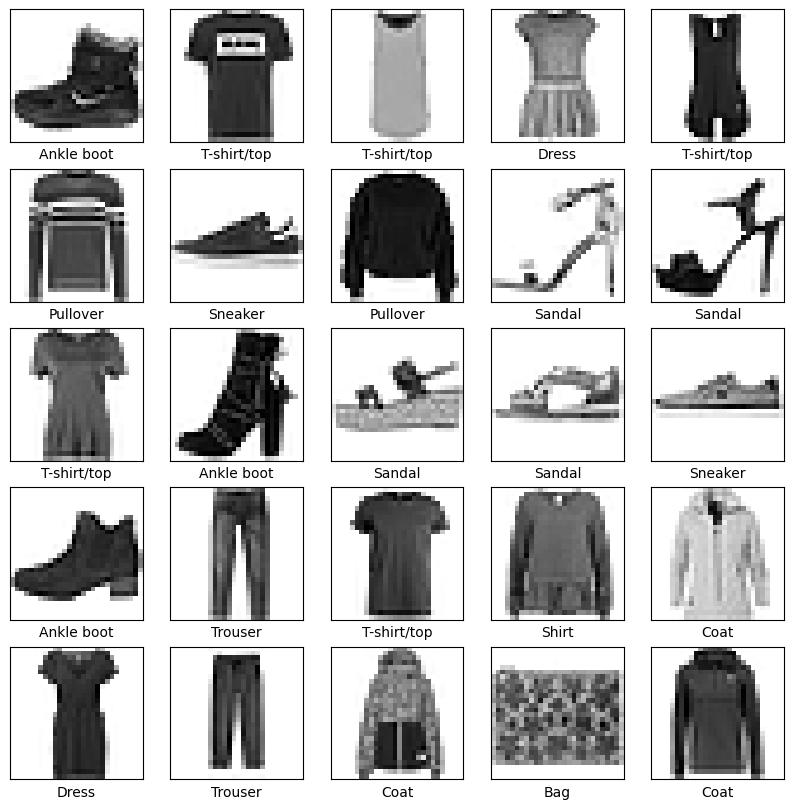

In [7]:
# Funtion to visualize the images 
def visualize_images(images, labels):
    # Define a figure with size 10 x 10
    plt.figure(figsize=(10, 10))

    # Plot the first 25 images from the dataset    
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap = plt.cm.binary)
        plt.xlabel(class_labels[labels[[i][0]]])
    plt.show()

# Plot the first 25 images from the training dataset with labels  
visualize_images(X_train_images, y_train_labels)

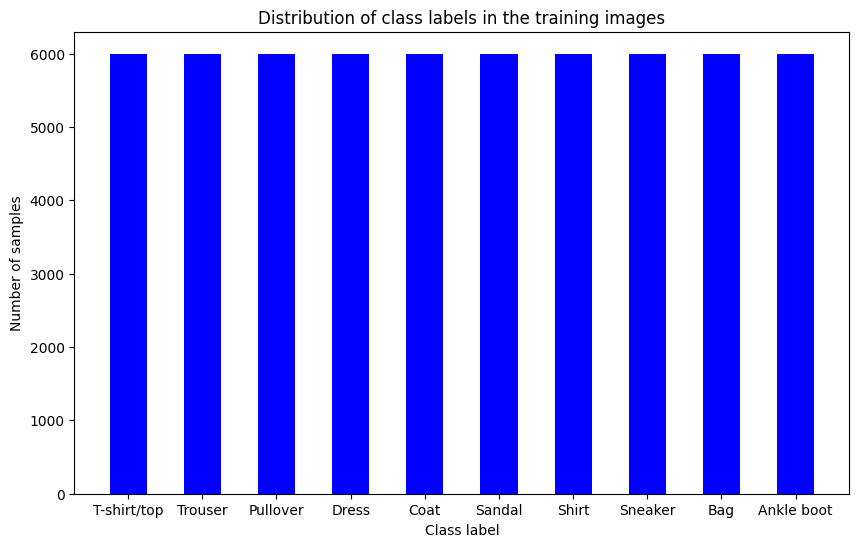

In [8]:
# Plot a bar chart for the distribution of the class labels

# Count the number of occurrences for each class
class_counts = np.bincount(y_train_labels, minlength = 10)

# Plot the bar chart
plt.figure(figsize = (10, 6))
plt.bar(class_labels, class_counts, align = 'center', width = 0.5, color = 'b')
plt.xlabel('Class label')
plt.ylabel('Number of samples')
plt.title('Distribution of class labels in the training images')
plt.xticks(class_labels)
plt.show()

## Build an Artificial Neural Network

In [9]:
# Build the model using a convolutional neural network

# Define an object of the sequence of layers
model_fmn = models.Sequential()

# Adding the first block of the convolutional and max pooling (input layer)
model_fmn.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (28, 28, 1))) # Using pixels of images and color for input shape
model_fmn.add(layers.MaxPooling2D((2, 2)))
              
# Adding the second block of the convolutional and max pooling (intermediate layer)
model_fmn.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model_fmn.add(layers.MaxPooling2D((2, 2)))

# Adding the third block of the convolutional and max pooling (intermediate layer)
model_fmn.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model_fmn.add(layers.MaxPooling2D((2, 2)))

In [10]:
# Adding classification layers
model_fmn.add(layers.Flatten())
model_fmn.add(layers.Dense(64, activation = 'relu'))
model_fmn.add(layers.Dense(10, activation = 'softmax')) # Considering the class labels (10) that we have

In [11]:
# Model summary to check layers
model_fmn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,554 (236.54 KB)

 Trainable params: 60,554 (236.54 KB)

 Non-trainable params: 0 (0.00 B)

## Compile the Model

In [12]:
# Compile the model

# Using loss function, optimizer, and accuracy metrics to monitor during training
model_fmn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

## Train the Model

In [13]:
%%time
# Using ten epochs to train the model, gathering the test data for validating 
history = model_fmn.fit(X_train_images, y_train_labels, epochs = 10, validation_data = (X_test_images, y_test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.7049 - loss: 0.8123 - val_accuracy: 0.8251 - val_loss: 0.4780
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 49s 23ms/step - accuracy: 0.8391 - loss: 0.4380 - val_accuracy: 0.8497 - val_loss: 0.4191
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8658 - loss: 0.3668 - val_accuracy: 0.8673 - val_loss: 0.3654
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.8809 - loss: 0.3208 - val_accuracy: 0.8770 - val_loss: 0.3415
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step - accuracy: 0.8908 - loss: 0.2939 - val_accuracy: 0.8772 - val_loss: 0.3473
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9025 - loss: 0.2647 - val_accuracy: 0.8740 - val_loss: 0.3534
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 19ms/step - accuracy: 0.9092 - loss: 0.2429 - val_accuracy: 0.8895 - val_loss: 0.3154
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9137 -

## Evaluate the Model

In [14]:
# Evaluate the model
test_loss, test_accuracy = model_fmn.evaluate(X_test_images, y_test_labels, verbose = 2) 

313/313 - 2s - 7ms/step - accuracy: 0.8878 - loss: 0.3364


In [15]:
print('\nTest accuracy: ', test_accuracy)


Test accuracy:  0.8877999782562256


In [16]:
print('\nTest loss: ', test_loss)


Test loss:  0.3364388048648834


## Test Set Prediction

In [17]:
# Display a few sample predictions along with the corresponding images

# Gathering the predictions from the test images
y_pred = model_fmn.predict(X_test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [69]:
# Loading libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Convert probabilities to class labels
y_pred_prob = np.argmax(y_pred, axis = 1)

print("\nAccuracy Score:", accuracy_score(y_test_labels, y_pred_prob))
print("\nConfusion Matrix:\n", confusion_matrix(y_test_labels, y_pred_prob))
print("\nClassification Report:\n", classification_report(y_test_labels, y_pred_prob))


Accuracy Score: 0.8878

Confusion Matrix:
 [[888   3  15  15   4   1  69   0   5   0]
 [  3 975   0  11   3   0   7   0   1   0]
 [ 38   0 758   7 115   0  81   0   1   0]
 [ 23  12  16 863  55   0  29   0   2   0]
 [  3   1  16   8 907   0  64   0   1   0]
 [  0   0   0   5   0 946   0  32   2  15]
 [152   2  52  20 115   0 651   0   8   0]
 [  0   0   0   0   0   4   0 964   0  32]
 [  7   0   4   0   7   2  10   2 967   1]
 [  0   1   0   0   0   3   1  36   0 959]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84      1000
           1       0.98      0.97      0.98      1000
           2       0.88      0.76      0.81      1000
           3       0.93      0.86      0.89      1000
           4       0.75      0.91      0.82      1000
           5       0.99      0.95      0.97      1000
           6       0.71      0.65      0.68      1000
           7       0.93      0.96      0.95      1000
           8 

In [83]:
# Getting the predictions for the test data

# Assuming y_test_labels contains the actual labels for the test dataset
y_true = y_test_labels

# Getting the indices of correctly classified samples
correct_samples = np.nonzero(y_pred_prob == y_true)[0]

# Get the indices of incorrectly classified samples
incorrect_samples = np.nonzero(y_pred_prob != y_true)[0]

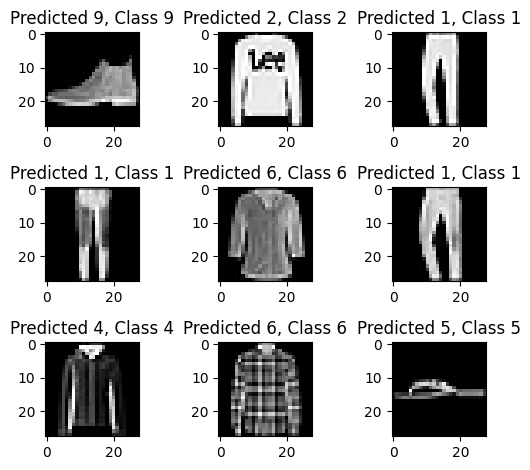

In [84]:
# Looping through the first 9 correctly classified samples
for i, correct_samples in enumerate(correct_samples[:9]):
    # Create a subplot with 3 rows and 3 columns
    plt.subplot(3, 3, i+1)
    # Display the image of the correctly classified sample   
    plt.imshow(X_test_images[correct_samples], cmap = 'gray', interpolation = 'none')
    # Setting the title of the subplot
    plt.title("Predicted {}, Class {}".format(y_pred_prob[correct_samples], y_true[correct_samples]))
    # Adjust the layout to prevent overlap
    plt.tight_layout()

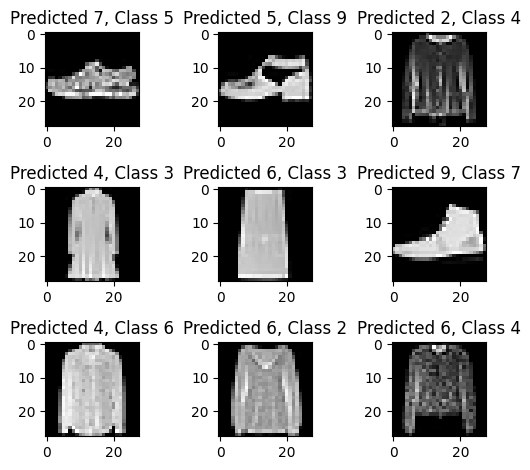

In [87]:
# Looping through the first 9 incorrectly classified samples
for i, incorrect_samples in enumerate(incorrect_samples[:9]):
     # Create a subplot with 3 rows and 3 columns
    plt.subplot(3, 3, i+1)
    # Display the image of the incorrectly classified sample
    plt.imshow(X_test_images[incorrect_samples], cmap='gray', interpolation='none')
    # Setting the title of the subplot
    plt.title("Predicted {}, Class {}".format(y_pred_prob[incorrect_samples], y_true[incorrect_samples]))
    # Adjust the layout to prevent overlap
    plt.tight_layout()